In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## Set directory

Set the directory of the train run you want to visualize. It contains the following files:

* loss.pickle
* reward.pickle
* reward_clamped.pickle

In [2]:
sub_dir = 'Breakout-v0_20180113_084015/'

In [3]:
loss_file = sub_dir + '/loss.pickle'
reward_file = sub_dir + '/reward.pickle'
reward_clamped_file = sub_dir + '/reward_clamped.pickle'

with open(loss_file, 'rb') as fp:
    loss_history = pickle.load(fp)
with open(reward_file, 'rb') as fp:
    reward_history = pickle.load(fp)
with open(reward_clamped_file, 'rb') as fp:
    reward_clamped_history = pickle.load(fp)

# Loss history

141460


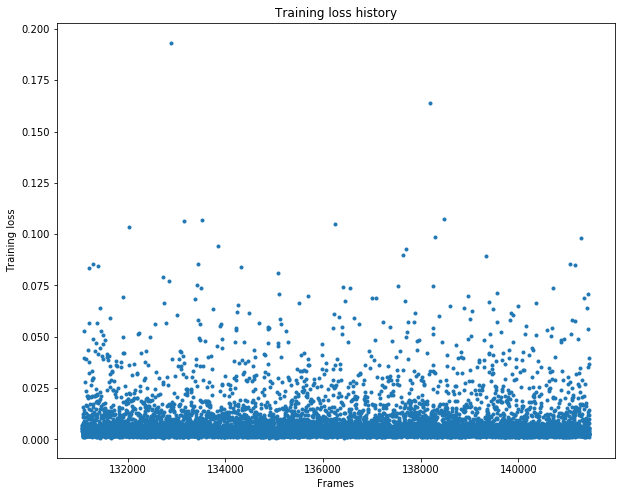

In [4]:
plt.plot(loss_history, '.')
plt.title('Training loss history')
plt.xlabel('Frames')
plt.ylabel('Training loss')
print(len(loss_history))
plt.show()

# Reward history

In [5]:
def calculate_avg(history, avg_length):
    # Calculate start of every period
    start_period = [i for i in range(0,len(history)-1,avg_length)]
    # Calculate mean of the periods
    avg_period = [np.mean(history[start:start+avg_length]) for start in start_period]
    # Calculate mean episode of the periods
    episode = [i for i in range(avg_length//2, len(history), avg_length)]
    return episode, avg_period

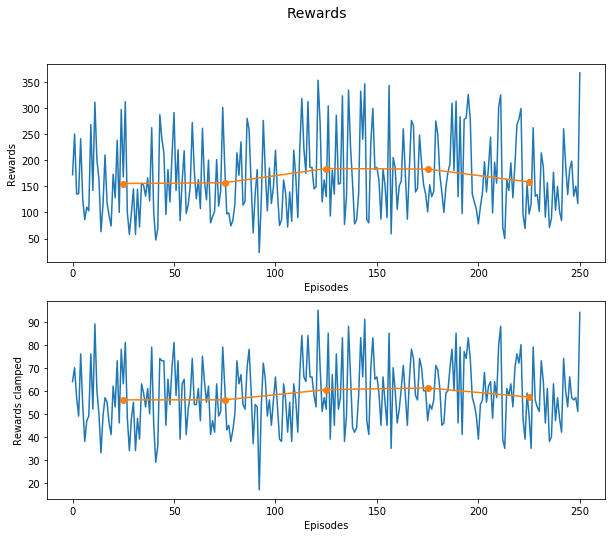

In [6]:
fig = plt.gcf()
fig.suptitle('Rewards', fontsize=14)

plt.subplot(2, 1, 1)
plt.plot(reward_history, '-')
episode, avg = calculate_avg(reward_history, avg_length=50)
plt.plot(episode, avg, 'o-')
plt.xlabel('Episodes')
plt.ylabel('Rewards')

plt.subplot(2, 1, 2)
plt.plot(reward_clamped_history, '-')
episode, avg = calculate_avg(reward_clamped_history, avg_length=50)
plt.plot(episode, avg, 'o-')
plt.xlabel('Episodes')
plt.ylabel('Rewards clamped')

plt.show()